In [21]:
import requests
import pandas as pd
from datetime import date
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta
import numpy as np

In [2]:
# Nifty 50 Stocks

df_stocks = pd.read_csv("https://archives.nseindia.com/content/indices/ind_nifty50list.csv")

In [3]:
# Preparing Start Date and End Date for fetching data from yahooFinance.com.

today  = date.today()
enddate = time.mktime(today.timetuple())
enddate = str(int(enddate))


startdate = datetime.now().date().replace(year=2019, month=2, day=17)
stdate=time.mktime(startdate.timetuple())
stdate=str(int(stdate))

In [4]:
# Stock to predict

stock = 'ADANIENT'

In [5]:
# url for historical data 

url = "https://query1.finance.yahoo.com/v7/finance/download/" +stock+ ".NS?period1=" + stdate+ "&period2=" + enddate+ "&interval=1d&events=history&includeAdjustedClose=true"

In [6]:
df = pd.read_csv(url)

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-18,118.300003,119.900002,116.099998,117.500000,116.166298,2569451
1,2019-02-19,118.400002,119.800003,116.800003,118.250000,116.907776,2644152
2,2019-02-20,117.949997,121.099998,116.199997,120.050003,118.687347,3739081
3,2019-02-21,119.800003,121.000000,117.900002,119.400002,118.044731,2698192
4,2019-02-22,120.250000,130.699997,119.800003,128.050003,126.596542,14695085
...,...,...,...,...,...,...,...
986,2023-02-13,1850.000000,1921.699951,1662.250000,1717.650024,1717.650024,12210940
987,2023-02-14,1735.000000,1889.000000,1611.349976,1749.699951,1749.699951,14579030
988,2023-02-15,1780.000000,1824.400024,1750.000000,1779.099976,1779.099976,7636578
989,2023-02-16,1820.000000,1874.949951,1790.000000,1796.599976,1796.599976,5578515


In [8]:
df2 = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [9]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
# Converting the date data type (object --> datetime)

df['Date'] = pd.to_datetime(df['Date'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       991 non-null    datetime64[ns]
 1   Open       991 non-null    float64       
 2   High       991 non-null    float64       
 3   Low        991 non-null    float64       
 4   Close      991 non-null    float64       
 5   Adj Close  991 non-null    float64       
 6   Volume     991 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 54.3 KB


In [39]:
# Setting date column as index

df = df.set_index('Date')

In [40]:
df.index

DatetimeIndex(['2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-25', '2019-02-26', '2019-02-27',
               '2019-02-28', '2019-03-01',
               ...
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-13', '2023-02-14', '2023-02-15',
               '2023-02-16', '2023-02-17'],
              dtype='datetime64[ns]', name='Date', length=991, freq=None)

# EDA

<AxesSubplot:xlabel='Date'>

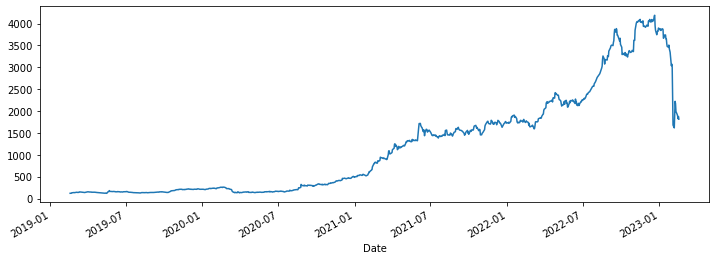

In [41]:
df['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

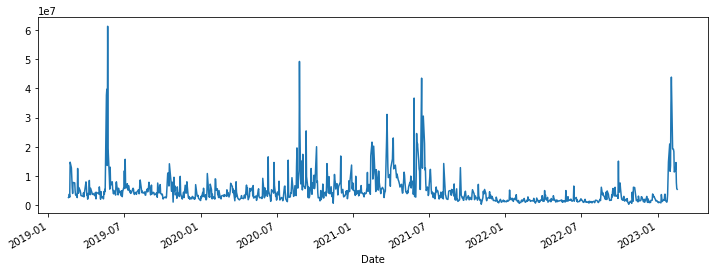

In [42]:
df['Volume'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

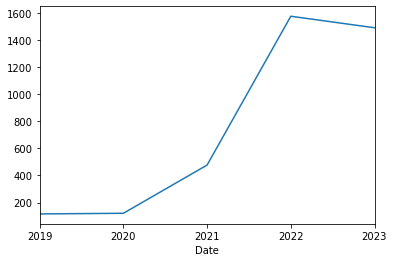

In [43]:
# Year End Frequency -Min price

df.resample(rule='A').min()['Open'].plot()

<AxesSubplot:xlabel='Date'>

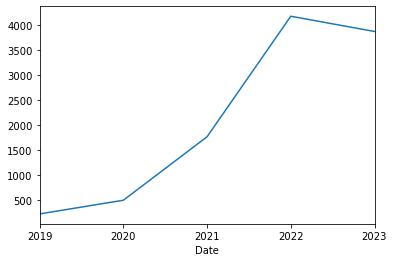

In [44]:
# Year end Frequency -Max price

df.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

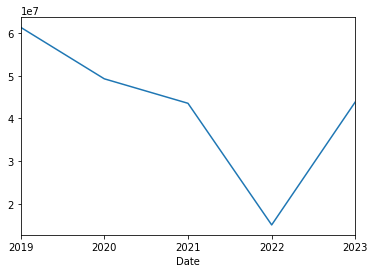

In [45]:
# Year End Frequency -Max volume

df.resample(rule='A').max()['Volume'].plot()

<AxesSubplot:xlabel='Date'>

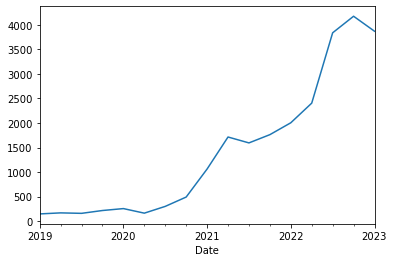

In [46]:
# Quarterly Start Frequency - Max price

df.resample(rule='QS').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

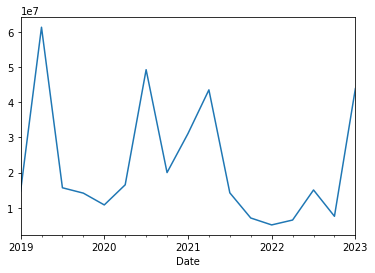

In [47]:
# Quarterly Start Frequency - Volume price

df.resample(rule='QS').max()['Volume'].plot()

<AxesSubplot:xlabel='Date'>

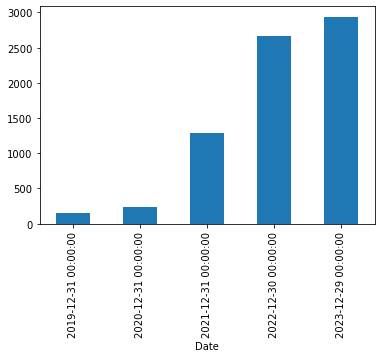

In [48]:
# Business Year End Frequency - Price

df['Open'].resample(rule='BA').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

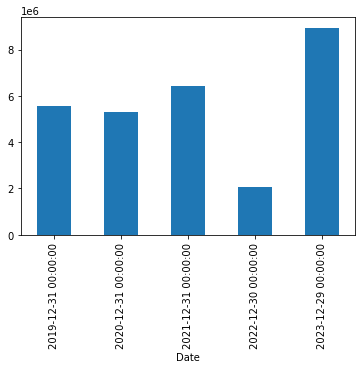

In [49]:
# Business Year End Frequency - Volume

df['Volume'].resample(rule='BA').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

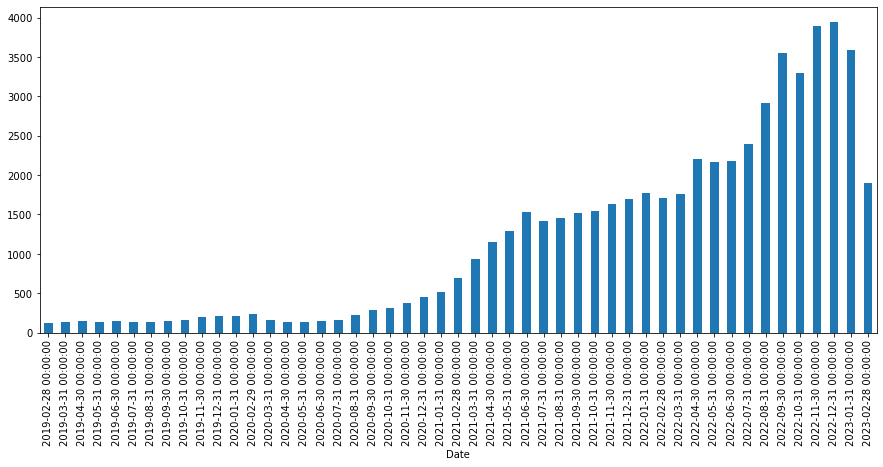

In [50]:
# Month End Frequency - Price

df['Open'].resample(rule='M').mean().plot(kind='bar', figsize=(15,6))

<AxesSubplot:xlabel='Date'>

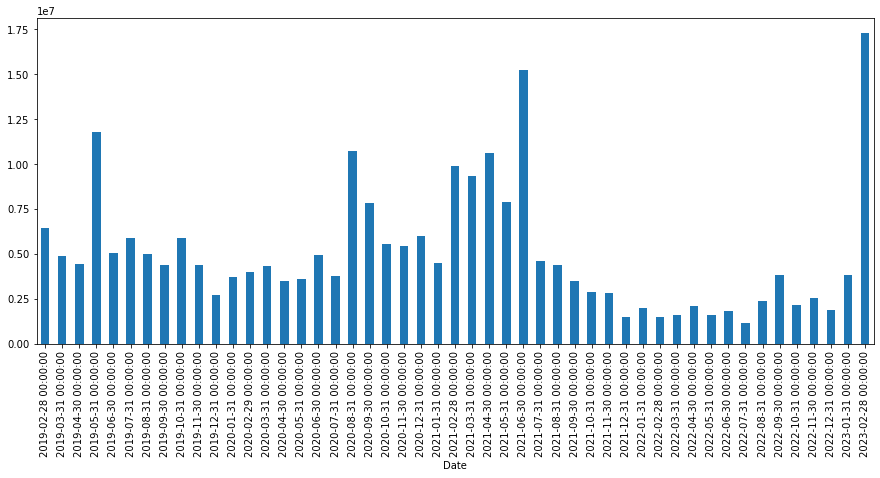

In [51]:
# Month End Frequency - Volume

df['Volume'].resample(rule='M').mean().plot(kind='bar', figsize=(15,6))

In [55]:
# Simple Moving Average 

df['Close_10_day_rolling'] = df['Close'].rolling(window=10, min_periods=1).mean()

In [56]:
df['Close_20_day_rolling'] = df['Close'].rolling(window=20, min_periods=1).mean()

In [57]:
df['Close_50_day_rolling'] = df['Close'].rolling(window=50, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

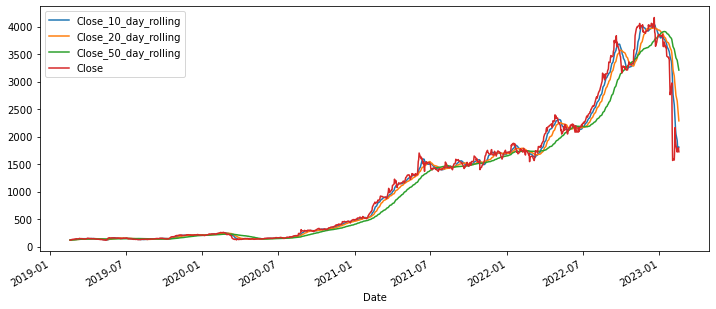

In [58]:
df[['Close_10_day_rolling','Close_20_day_rolling','Close_50_day_rolling','Close']].plot(figsize=(12,5))

In [59]:
# Cummulative Moving Average

df['CMA_close'] = df['Close'].expanding().mean()

<AxesSubplot:xlabel='Date'>

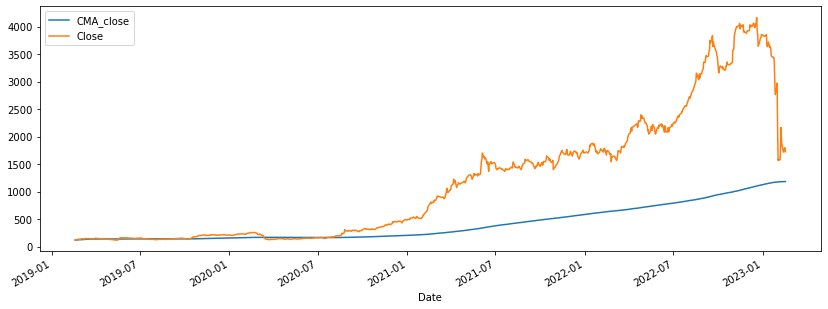

In [60]:
df[['CMA_close', 'Close']].plot(figsize=(14,5))

In [61]:
# Exponential Moving Average

df['EMA_10']=df.ta.ema(close='Close', length=10, append=True)
df['EMA_20']=df.ta.ema(close='Close', length=20, append=True)
df['EMA_30']=df.ta.ema(close='Close', length=30, append=True)
df['EMA_50']=df.ta.ema(close='Close', length=50, append=True)

<AxesSubplot:xlabel='Date'>

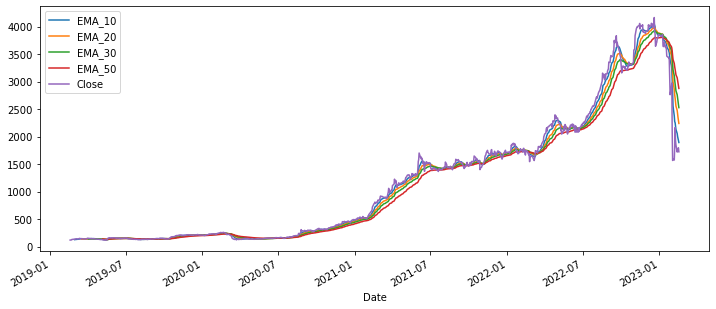

In [62]:
df[['EMA_10','EMA_20','EMA_30','EMA_50','Close']].plot(figsize=(12,5))